### Hypothesis: All features do not have a significant impact on the Target variable
Experiment: Extract the important features that are relevant in understanding the behaviour of customers who are potentially looking to buy a new vehicle

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
car_clean1 = pd.read_csv('../datasets/car_repur_clean1.csv')

In [2]:
car_clean1.shape

(131337, 14)

In [3]:
# select the numeric data to analyse the correlation between them by plotting a heatmap
num_data = car_clean1.select_dtypes(include=np.number) 
num_cols = num_data.columns.tolist()

<Axes: >

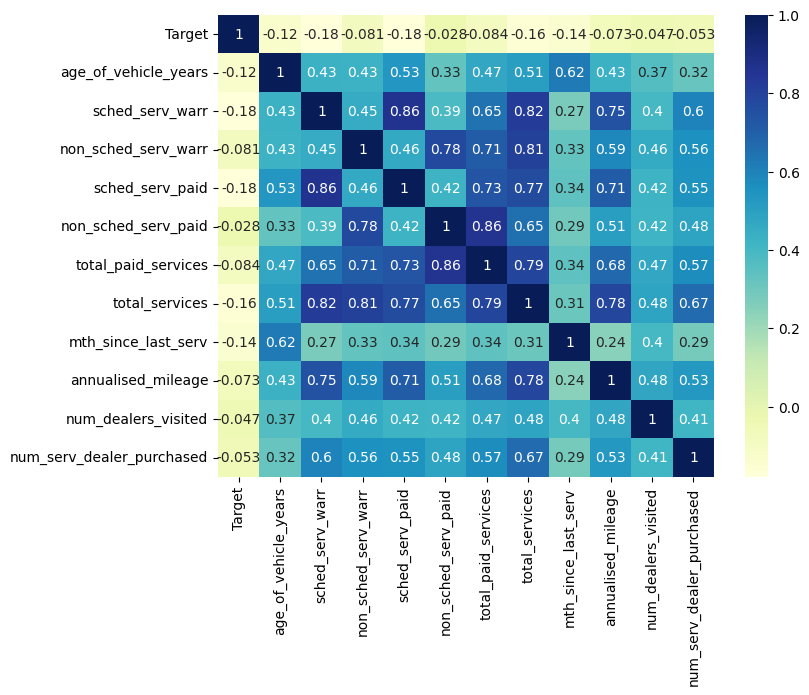

In [4]:
# import visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

#set figure size
plt.figure(figsize=(8, 6))
# Correlation matrix
corr_matrix = num_data.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)

<b>age_of_vehicle_years, sched_serv_warr, sched_serv_paid, total_services, mth_since_last_serv </b>are the variables which have high correlation with the Target value. 

### Fit Random Forest to get the important features that contribute to the model's performance 

In [5]:
# import Random forest classifier package from sklearn
from sklearn.ensemble import RandomForestClassifier

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(car_clean1)

# Separate the features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Fit a random forest model
rf = RandomForestClassifier(random_state=23)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(feature, importance)


age_of_vehicle_years 0.09616131034807723
sched_serv_warr 0.07164262837805813
non_sched_serv_warr 0.05975739361433476
sched_serv_paid 0.058346207653924245
non_sched_serv_paid 0.04388946229414163
total_paid_services 0.058822742371894624
total_services 0.07662223845441568
mth_since_last_serv 0.16206330919579162
annualised_mileage 0.13149122805667626
num_dealers_visited 0.06993530800885966
num_serv_dealer_purchased 0.11718642789542352
car_model_model_1 0.003995727824605998
car_model_model_10 0.002806106500747545
car_model_model_11 0.0025190043095325
car_model_model_12 0.0003761625224547043
car_model_model_13 0.0012952777606704457
car_model_model_14 0.00020190606747202955
car_model_model_15 0.00041082224981537436
car_model_model_16 0.00025926065658923956
car_model_model_17 0.00034901933370071187
car_model_model_18 0.0005417948999514089
car_model_model_19 7.403716208799592e-09
car_model_model_2 0.005371969552246162
car_model_model_3 0.0055750641800750055
car_model_model_4 0.00358221925763624

As we can see from the feature_importances_ table, car_model and car_segment doesnt contribute much to the outcome of the model (very very less).

<b>The top features which contribute the most to the overall predictive performance of the random forest model are: </b> </br> 
mth_since_last_serv contribute 16.2% </br>
annualised_mileage 13% </br>
num_serv_dealer_purchased 11.7% </br>
total_services 7.6% </br>
sched_serv_warr 7% </br>
num_dealers_visited 6.9% </br>

We can take these important features(combined from feature importances and correlation values) from the dataset and try training a model to see if they really improve the last model's performance. 

In [6]:
# taking all important features extracted from above techniques
car_clean2_feat = ["mth_since_last_serv", "annualised_mileage" , "num_serv_dealer_purchased", 
                   "num_dealers_visited", "age_of_vehicle_years", "sched_serv_warr", 
                   "total_services","sched_serv_paid", "Target"] 

car_clean2 = car_clean1[car_clean2_feat]

In [7]:
car_clean2.shape

(131337, 9)

In [8]:
# Saving the data to csv file to use it in next experiment
car_clean2.to_csv('../datasets/car_repur_clean2.csv', index=False)

### Logistic Regression

In [9]:
# Import sklearn packages to preprocess data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining X and y from the data - dependent, independent variables
X = car_clean2.iloc[:,0:8]
y = car_clean2.iloc[:,8]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.25, stratify=y,
                                    random_state=23, shuffle=True)

# Scale the numeric columns
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#importing sklearn packages to fit logistic regression model and evaluate it
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred, pos_label=1)
print(classification_report(y_test, y_pred))
print("Recall for target 1:", recall)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     31955
           1       0.82      0.19      0.30       880

    accuracy                           0.98     32835
   macro avg       0.90      0.59      0.65     32835
weighted avg       0.97      0.98      0.97     32835

Recall for target 1: 0.18522727272727274


### Random Forest

In [11]:
# Import Random forest classifier and train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=23)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31955
           1       0.90      0.78      0.83       880

    accuracy                           0.99     32835
   macro avg       0.95      0.89      0.91     32835
weighted avg       0.99      0.99      0.99     32835



In [13]:
# Evaluate the model using confusion matrix and recall score for target 1
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)

print("Confusion matrix:\n", conf_matrix)
print("Recall for target 1:", recall)

Confusion matrix:
 [[31876    79]
 [  195   685]]
Recall for target 1: 0.7784090909090909


In [14]:
# importing pickle library
import pickle
# choose the filename you want
filename = '../models/rf_model_num_exp2.sav'
# dump the model
pickle.dump(model, open(filename, 'wb'))

### Appendix

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the ANOVA table
model = ols('Target ~ car_model + car_segment + age_of_vehicle_years + sched_serv_warr + non_sched_serv_warr + sched_serv_paid + non_sched_serv_paid + total_paid_services + total_services + mth_since_last_serv + annualised_mileage + num_dealers_visited + num_serv_dealer_purchased', 
            data=car_clean1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


                                sum_sq        df            F         PR(>F)
car_model                     0.000228      18.0     0.000526   9.994742e-01
car_segment                   0.000038       3.0     0.000526   9.994742e-01
age_of_vehicle_years          0.688140       1.0    28.601067   8.908135e-08
sched_serv_warr               1.356536       1.0    56.381482   6.006493e-14
non_sched_serv_warr           0.367292       1.0    15.265714   9.344322e-05
sched_serv_paid              17.638330       1.0   733.099079  5.275753e-161
non_sched_serv_paid           0.000372       1.0     0.015482   9.009785e-01
total_paid_services           7.326584       1.0   304.513629   4.087781e-68
total_services               26.772315       1.0  1112.733458  5.905688e-243
mth_since_last_serv          34.242869       1.0  1423.230898  8.701642e-310
annualised_mileage           33.409677       1.0  1388.601059  2.426588e-302
num_dealers_visited           2.132807       1.0    88.645534   4.795687e-21

/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
